## Обработка датасэта

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns


In [143]:
TRAIN_DATASET_PATH = "C:/Users/lukfi/YandexDisk/GB/Алгоритмы анализа данных/Курсовой проект/data/train.csv"
TEST_DATASET_PATH = "C:/Users/lukfi/YandexDisk/GB/Алгоритмы анализа данных/Курсовой проект/data/test.csv"

In [144]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, index_col='Id')
train_df.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
Id,,,,,,,,,,,,
0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [145]:
test_df = pd.read_csv(TEST_DATASET_PATH, index_col='Id')
test_df.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
Id,,,,,,,,,,,
10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


В датасэте нет пропущенных значений.

In [146]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
 10  mean_exam_points     10000 non-null  float64
 11  choose               10000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1015.6 KB


In [147]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10000 to 19999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
 10  mean_exam_points     10000 non-null  float64
dtypes: float64(11)
memory usage: 937.5 KB


In [148]:
train_df.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


In [149]:
test_df.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.924500,1.985700,1699.910000,1.702300,0.372100,0.128100,0.115800,0.049000,0.029200,0.015100,64.149400
std,8.031977,1.771217,526.260094,0.789644,0.483389,0.334218,0.320001,0.215879,0.168375,0.121957,13.570096
min,23.000000,0.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,41.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,46.000000,2.000000,1550.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,68.000000,9.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000


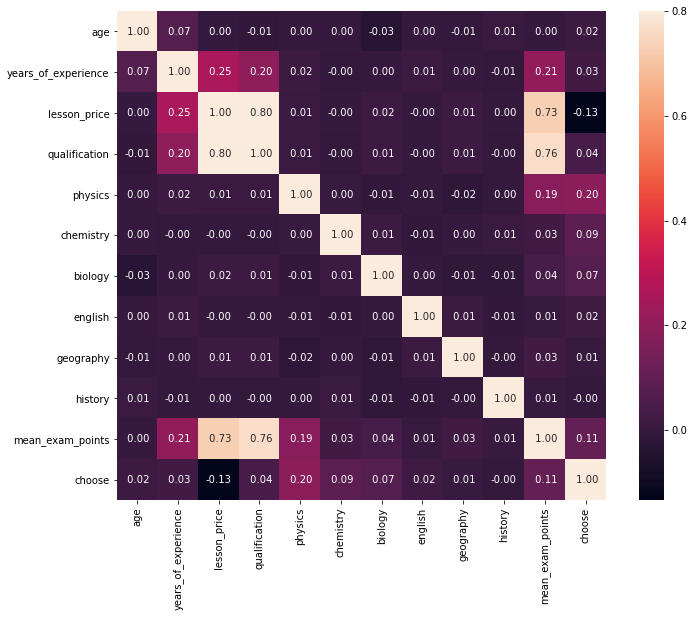

In [150]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train_df.corr(), vmax=.8, annot=True, fmt=' .2f', square=True);

Видно что целевая переменная коррелирует со стоимость занятий, и средним баллом.

In [151]:
list(train_df)

['age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history',
 'mean_exam_points',
 'choose']

In [152]:
train_df['years_of_experience'][train_df['years_of_experience'] == 0].shape[0]/train_df['years_of_experience'].shape[0]

0.2774

Около трети значений в поле years_of_experience равна нулю. Мне кажется это важный параметр, заполним его, основываясь на стоимости уроков(чем более опытный преподаватель, тем дороже его уроки).

In [153]:
exp0_ind = train_df['years_of_experience'][train_df['years_of_experience'] == 0].index 
price_ = train_df['lesson_price'][train_df['years_of_experience'] != 0].unique()
for i in exp0_ind:
    if train_df.lesson_price[i] in price_:
        
        train_df.years_of_experience[i] = train_df['years_of_experience'][(train_df['years_of_experience'] != 0) & (train_df['lesson_price'] == train_df.lesson_price[i])].mean()
        
    else:
        
        train_df.years_of_experience[i] = train_df['years_of_experience'].mode()[0]

<ipython-input-153-ff4c5ee9e58b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.years_of_experience[i] = train_df['years_of_experience'][(train_df['years_of_experience'] != 0) & (train_df['lesson_price'] == train_df.lesson_price[i])].mean()


In [154]:
exp0_ind = test_df['years_of_experience'][test_df['years_of_experience'] == 0].index 
price_ = test_df['lesson_price'][test_df['years_of_experience'] != 0].unique()
for i in exp0_ind:
    if test_df.lesson_price[i] in price_:
        
        test_df.years_of_experience[i] = test_df['years_of_experience'][(test_df['years_of_experience'] != 0) & (test_df['lesson_price'] == test_df.lesson_price[i])].mean()
        
    else:
        
        test_df.years_of_experience[i] = test_df['years_of_experience'].mode()

Проверим, сколько строк не имеет обозначения предмета. Предположим, что преподаватель препоает какой-то другой предмет.

In [155]:
col = [ 'physics',
        'chemistry',
        'biology',
        'english',
        'geography',
        'history']
train_df['flag'] = train_df[col].sum(axis=1)
test_df['flag'] = test_df[col].sum(axis=1)
train_df['other_subj'] = 0
test_df['other_subj'] = 0
train_df.loc[train_df['flag'] == 0, 'other_subj' ] = 1
test_df.loc[test_df['flag'] == 0, 'other_subj' ] = 1

Если все предметы классифицированы нулем, то вероятность что данный преподаватель буде выбран, минимальна.

In [157]:
train_df[(train_df['flag'] == 0) & (train_df['choose'] == 1)].shape[0]/train_df[(train_df['flag'] == 0)].shape[0]

0.047249486418625884

Добавим признак эфективности затраченных средств, в пересчете на балл.

In [159]:
train_df['efficiency'] = train_df['lesson_price']/train_df['mean_exam_points']
test_df['efficiency'] = test_df['lesson_price']/test_df['mean_exam_points']

Уберем признак flag, он негативно влияет на метрику.

In [160]:
train_df = train_df.drop(columns = 'flag')
test_df = test_df.drop(columns = 'flag')

Добавим новый признак, на основе комбинации предметов, и вероятности выбора преподавателя, с такой комбинацией.

In [170]:
group = train_df[[ 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history']].values
choose =  train_df['choose'].values
ver_ = np.zeros(len(choose))
unique_val,count_val = np.unique(group,return_counts = True, axis = 0)
unique_ver = []
for i in range(len(unique_val)):
    arr = []
    arr = np.where(np.all(unique_val[i] == group, axis=1))[0]
    ver = np.round(choose[arr].sum()/count_val[i],2)
    unique_ver.append(ver)
    ver_[arr] = ver
    


In [174]:
train_df['class_ver'] = ver_

Добавим эти классы в тренировочную выборкую

In [183]:
group = test_df[[ 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history']].values
test_class = np.zeros(len(test_df['age']))
for i in range(len(unique_val)):
    arr = []
    arr = np.where(np.all(unique_val[i] == group, axis=1))[0]
    test_class[arr] = unique_ver[i]

In [185]:
test_df['class_ver'] = test_class

Видно что, чем выше квалификация, тем выше средний балл. Поскольку разница между 1 и 2, а также 3 и 4 невелика, добавим новый признак с классификацией на 2 группы.

In [211]:
for i in range(1,5):    
    q = train_df['mean_exam_points'][train_df['qualification'] == i].sum()/len(train_df['mean_exam_points'][train_df['qualification'] == i].values)
    print(f'qualification={i}, средний бал равен {q}')

qualification=1, средний бал равен 55.89429564506236
qualification=2, средний бал равен 65.03363006923838
qualification=3, средний бал равен 83.63181367690783
qualification=4, средний бал равен 85.46551724137932


In [212]:
train_df['qual_group'] = 0

for i in range(1,5):    
    if i < 3:
        train_df['qual_group'][train_df['qualification'] == i] = 1
    
    else:
        train_df['qual_group'][train_df['qualification'] == i] = 2
    

<ipython-input-212-4eca2c66befb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['qual_group'][train_df['qualification'] == i] = 1
<ipython-input-212-4eca2c66befb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['qual_group'][train_df['qualification'] == i] = 2


In [220]:
test_df['qual_group'] = 0

for i in range(1,5):    
    if i < 3:
        test_df['qual_group'][test_df['qualification'] == i] = 1
    
    else:
        test_df['qual_group'][test_df['qualification'] == i] = 2

<ipython-input-220-4396f2de7e46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['qual_group'][test_df['qualification'] == i] = 1
<ipython-input-220-4396f2de7e46>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['qual_group'][test_df['qualification'] == i] = 2


## Сохранение, внесенных изменений.

In [228]:
train_df.to_csv('C:/Users/lukfi/YandexDisk/GB/Алгоритмы анализа данных/Курсовой проект/data/train_df_prepeared.csv')
test_df.to_csv('C:/Users/lukfi/YandexDisk/GB/Алгоритмы анализа данных/Курсовой проект/data/test_df_prepeared.csv')